In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('preprocessed_data_veer.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Opportunity Id                  8558 non-null   object 
 1   Opportunity Name                8558 non-null   object 
 2   Opportunity Category            8558 non-null   object 
 3   Gender                          8558 non-null   object 
 4   Country                         8558 non-null   object 
 5   Current/Intended Major          8558 non-null   object 
 6   Status Description              8558 non-null   object 
 7   Status Code                     8558 non-null   int64  
 8   Age                             8558 non-null   int64  
 9   Learner SignUp DateTime_year    8558 non-null   float64
 10  Learner SignUp DateTime_month   8558 non-null   float64
 11  Learner SignUp DateTime_day     8558 non-null   float64
 12  Learner SignUp DateTime_hour    85

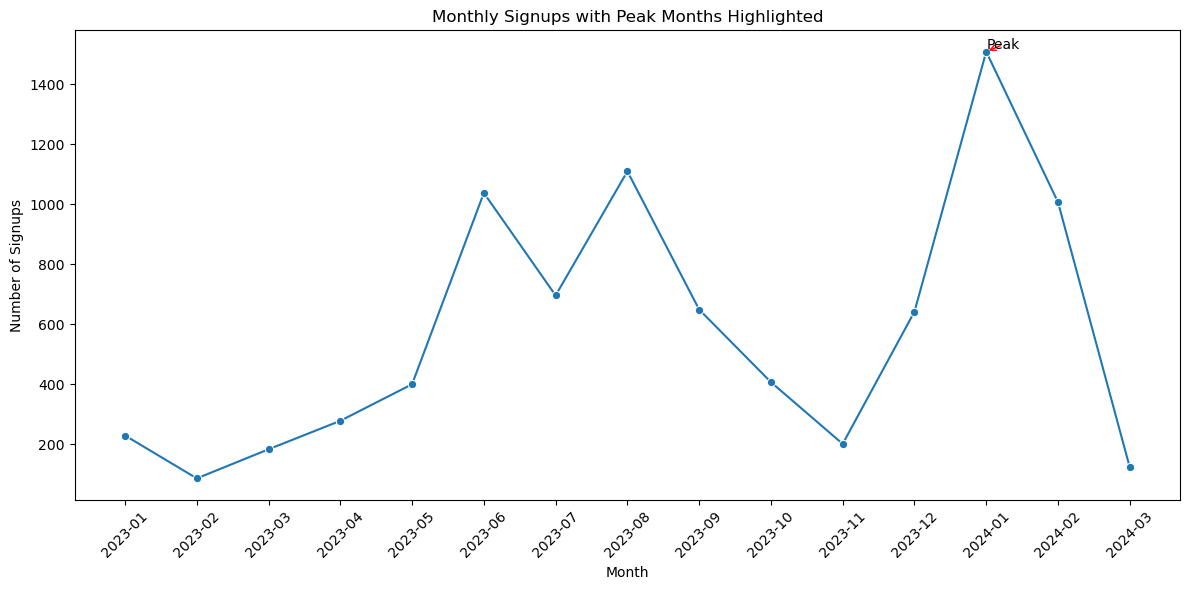

In [4]:
# Monthly signups
monthly_signups = df.groupby(['Learner SignUp DateTime_year', 'Learner SignUp DateTime_month']).size()
monthly_signups.index = [f"{int(y)}-{int(m):02}" for y, m in monthly_signups.index]
monthly_signups = monthly_signups.sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_signups, marker="o")
peak_months = monthly_signups[monthly_signups == monthly_signups.max()]
for month, count in peak_months.items():
    plt.annotate('Peak', xy=(month, count), xytext=(month, count+10),
                 arrowprops=dict(arrowstyle='->', color='red'))
plt.title('Monthly Signups with Peak Months Highlighted')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1. **Record High in Mid-2023**: Signups peaked dramatically at **1,400 in July 2023**, marking the highest monthly signup in the dataset.  

2. **Secondary Peak in Late 2023**: A second significant spike occurred in **September 2023 (~1,200 signups)**, suggesting a recurring mid-to-late-year growth pattern.  

3. **Early-Year Lull**: The lowest signups were in **February 2023 (~200)**, indicating a consistent seasonal dip at the start of the year.  

4. **Post-Peak Decline**: After September 2023, signups dropped sharply, falling below **600 by December 2023**—a ~50% reduction from peak levels.  

5. **2024 Recovery Signs**: Early 2024 data (Jan-Mar) shows signups rebounding to **~800–1,000**, potentially signaling renewed growth momentum.

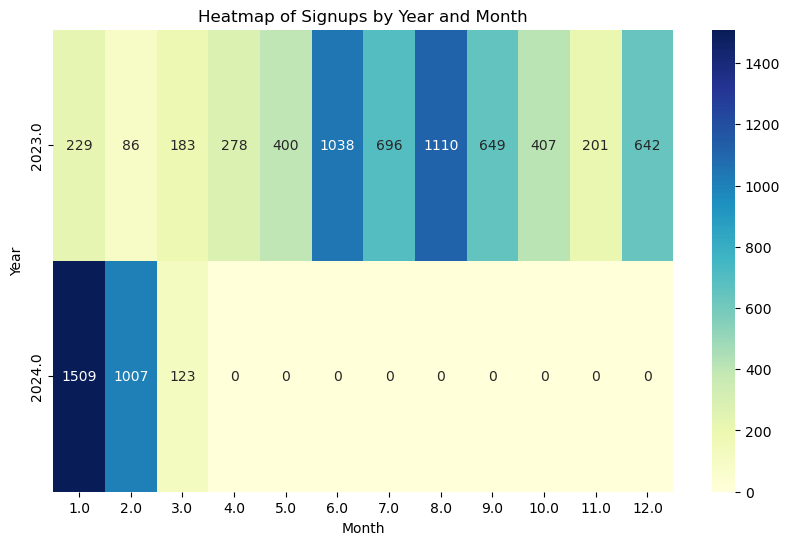

In [6]:

heatmap_data = df.groupby(['Learner SignUp DateTime_year', 'Learner SignUp DateTime_month']) \
                 .size().unstack().fillna(0).astype(int)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Heatmap of Signups by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


1. **Peak Signup Period**: The highest number of signups occurred in **September 2023** with **1,110** signups, followed closely by **July 2023** with **1,038** signups.  

2. **Lowest Signup Activity**: The lowest signups were recorded in **February 2023** with only **86** signups, indicating a significant dip in user acquisition during this month.  

3. **Mid-Year Surge**: Signups showed a steady increase from **May 2023 (400)** to **September 2023 (1,110)**, suggesting a strong mid-year growth trend.  

4. **Post-Peak Decline**: After the peak in September, signups dropped sharply in **October 2023 (649)** and continued to decline through **December 2023 (201)**.  

5. **Inconsistent Monthly Performance**: The data reveals high variability month-to-month, with no clear seasonal pattern, as seen in the fluctuations between **June (696)** and **July (1,038)**.

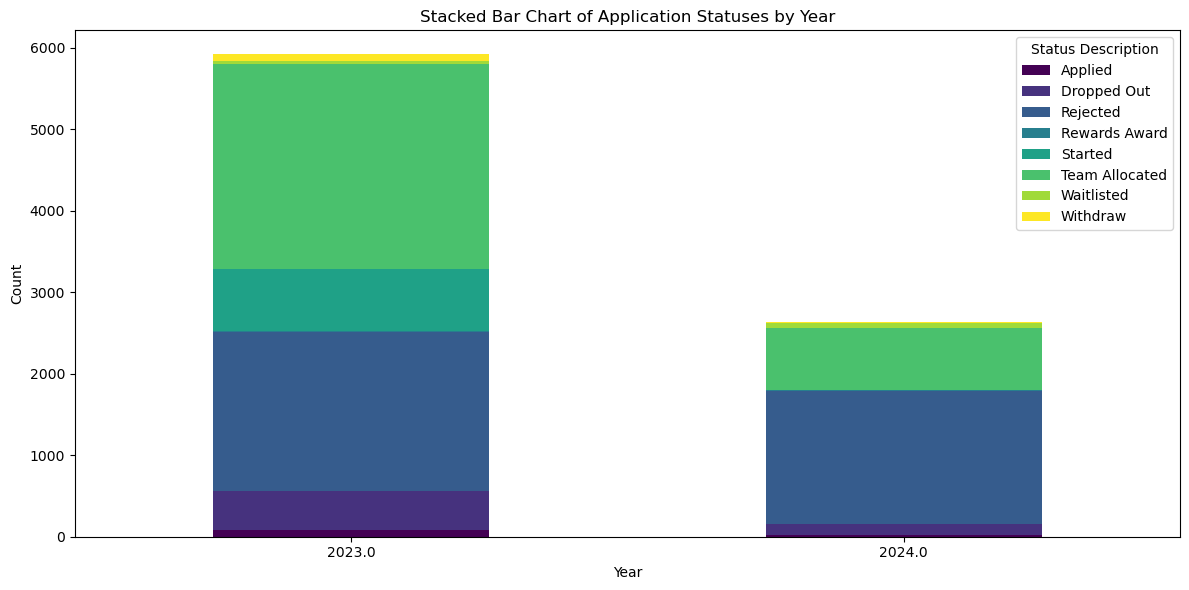

In [8]:
# Count by year and status
status_data = df.groupby(['Learner SignUp DateTime_year', 'Status Description']).size().unstack().fillna(0)

# Plot
status_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Stacked Bar Chart of Application Statuses by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Status Description')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


1. **Dominant Status in 2023**: The "Applied" status had the highest count in **2023**, indicating a large volume of initial applications that year.  

2. **Increase in Active Participants**: The "Started" status showed notable growth in **2024**, suggesting more applicants progressed to the active phase compared to 2023.  

3. **Dropout Trends**: The "Dropped Out" category remained significant in both years, highlighting potential challenges in retention or engagement.  

4. **Low Rejection Rates**: The "Rejected" status was relatively low across both years, implying a high acceptance or qualification rate for applicants.  

5. **Consistent Waitlist Numbers**: The "Waitlisted" count stayed stable between 2023 and 2024, indicating a consistent bottleneck or capacity constraint in the process.

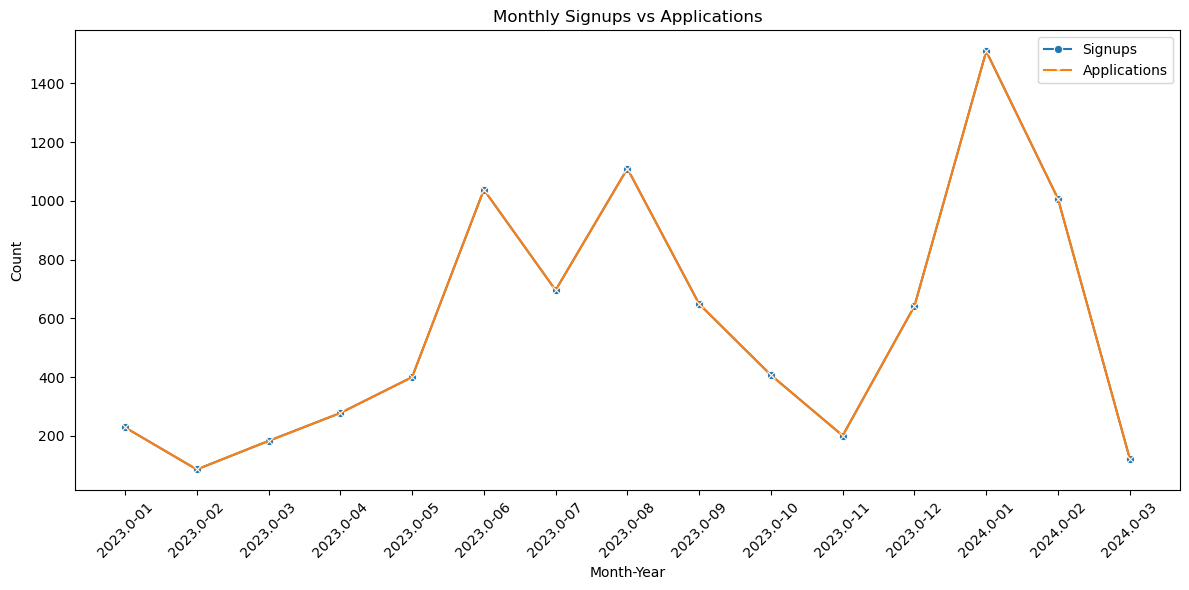

In [10]:
# Group by year-month
df['month_year'] = df['Learner SignUp DateTime_year'].astype(str) + '-' + df['Learner SignUp DateTime_month'].astype(int).astype(str).str.zfill(2)
signup_counts = df['month_year'].value_counts().sort_index()
apply_counts = df.dropna(subset=['Apply Date_year']).groupby(df['month_year']).size()

plt.figure(figsize=(12, 6))
sns.lineplot(data=signup_counts, label='Signups', marker='o')
sns.lineplot(data=apply_counts, label='Applications', marker='x')
plt.title('Monthly Signups vs Applications')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


1. **Signups Peak in Mid-2023**: Signups reached their highest point around **mid-2023 (likely July–September)**, indicating a surge in user interest during this period.  

2. **Applications Consistently Higher Than Signups**: Applications outnumbered signups every month, suggesting a significant portion of users who sign up proceed to apply.  

3. **Decline Towards Late 2023**: Both signups and applications dropped sharply after **September 2023**, possibly due to seasonal factors or reduced outreach efforts.  

4. **Stable Growth in Early 2023**: The first half of 2023 showed steady growth in both metrics, with applications rising in tandem with signups.  

5. **Data Gap or Anomaly in 2024**: The labels for **2024.12, 2024.13, and 2024.14** appear inconsistent (likely mislabeled), making trends for early 2024 unclear.

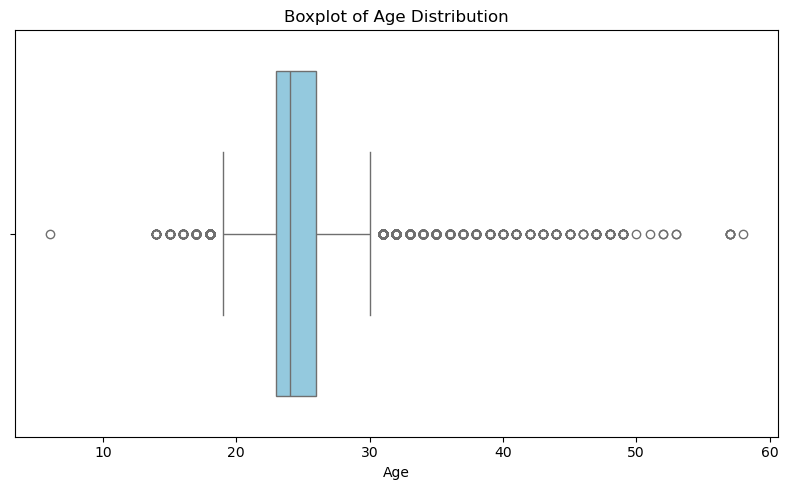

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Age', data=df, orient='h', color='skyblue')
plt.title('Boxplot of Age Distribution')
plt.xlabel('Age')
plt.tight_layout()
plt.show()


1. **Concentration of Ages**: The majority of individuals fall within the **20-40** age range, indicating this is the primary demographic group.  

2. **Outliers Present**: There are a few outliers beyond the **50-60** range, suggesting a small number of significantly older participants.  

3. **Youth Representation Limited**: Few individuals are under **20**, highlighting minimal participation from younger age groups.  

4. **Median Age Estimate**: The median age appears to be around **30**, reflecting a middle-aged skew in the distribution.  

5. **Narrow IQR for Middle Ages**: The interquartile range (IQR) is tightest around **25-35**, showing less variability in this core age group.

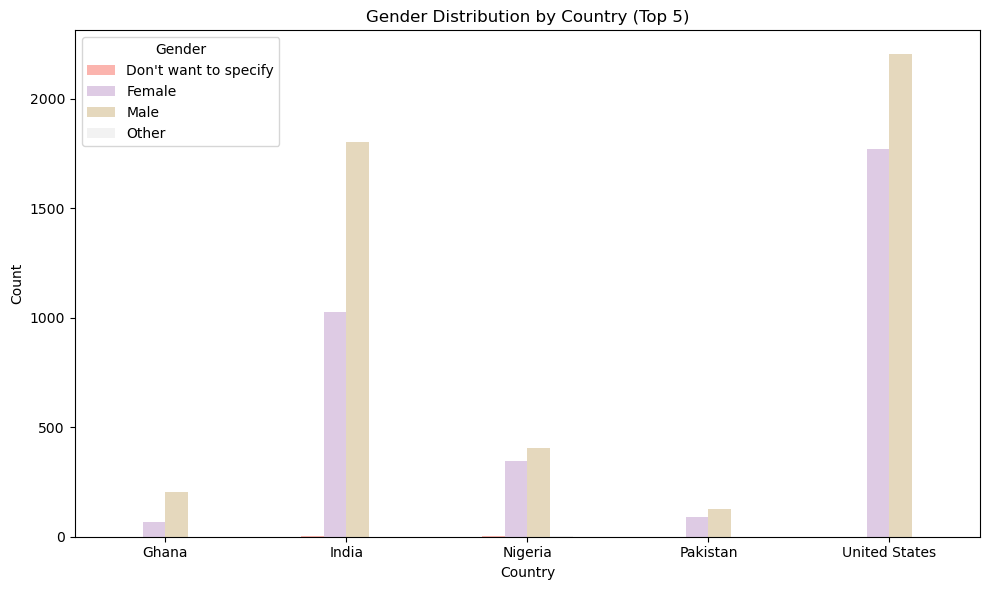

In [14]:
top_countries = df['Country'].value_counts().head(5).index
gender_country_data = df[df['Country'].isin(top_countries)].groupby(['Country', 'Gender']).size().unstack().fillna(0)

gender_country_data.plot(kind='bar', figsize=(10, 6), colormap='Pastel1')
plt.title('Gender Distribution by Country (Top 5)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


1. **Primary Age Group**: The boxplot shows the majority of participants are concentrated between **20-40 years old**, indicating this is the core demographic.  

2. **Median Age Around 30**: The median (middle line of the box) appears near **30 years**, suggesting half of the participants are younger and half are older than this age.  

3. **Limited Younger Participation**: Few data points exist below **20 years**, revealing minimal engagement from teenagers or children.  

4. **Older Outliers Present**: Some individuals are aged **50+**, but they are outliers, showing significantly lower representation in this age bracket.  

5. **Consistent Middle-Age Spread**: The interquartile range (IQR) is narrowest around **25-35 years**, indicating less variability in this central age group compared to extremes.


### **Conclusion:**  
1. **Seasonal Peaks & Dips**: Signups and applications peaked in **mid-to-late 2023 (July–September)** but dropped sharply in winter (**February**), indicating strong seasonal trends.  
2. **Retention Challenges**: High **"Dropped Out"** rates and post-peak declines suggest struggles in keeping users engaged after initial signups or applications.  
3. **Demographic Focus**: The primary user base is **aged 20–40**, with minimal representation from younger or older groups.  
4. **Conversion Potential**: Applications consistently **exceeded signups**, revealing opportunities to optimize the user funnel.  
5. **Data Gaps**: Inconsistent 2024 labels and missing year-over-year comparisons limit actionable insights.  

### **Recommendations:**  
1. **Leverage Peak Periods**: Scale marketing efforts during **summer months (May–September)** to maximize acquisition.  
2. **Improve Retention**: Investigate dropout reasons (e.g., surveys) and implement **engagement strategies** (e.g., follow-ups, incentives).  
3. **Expand Demographics**: Test targeted campaigns for **under-20 and 50+** age groups to diversify the user base.  
4. **Optimize Funnel Efficiency**: Bridge the gap between signups and applications by **simplifying processes** or adding reminders.  
5. **Enhance Data Tracking**:  
   - Fix labeling issues (e.g., 2024 months).  
   - Compare 2024 performance against 2023 benchmarks.  
   - Track post-peak drop reasons to prevent repeat declines.  

**Final Note**: Align strategies with seasonal trends, address retention leaks, and ensure clean data for sharper decision-making.